In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.io as sio
import sklearn
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

<class 'dict'>
['__header__', '__version__', '__globals__', 'fea', 'gnd']
1440 [20]


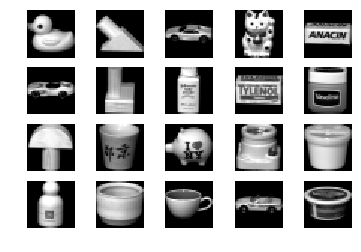

In [70]:
#visualize the COIL20
#draw in a 4x5 backgound
coil_url = 'data/COIL20.mat'
coil = sio.loadmat(coil_url)

print(type(coil))
keys = list( coil.keys() )
print(keys)

gnd = coil['gnd']
mxcluster = max( gnd )

dataset_coil = coil['fea']
n = len(dataset_coil)
print(n, mxcluster)

for i in range(0,1440,72):
    #decode the 1024 vector to a 32x32 mat ( can we call it 'inv-stretch' ? )
    img = dataset_coil[i].reshape(32,32)
    #calculate the position and show
    plt.subplot( 4, 5, i//72 + 1 )
    plt.axis('off')
    plt.imshow(img.T)
plt.show()

<class 'dict'>
['__header__', '__version__', '__globals__', 'fea', 'gnd']
165 [15]


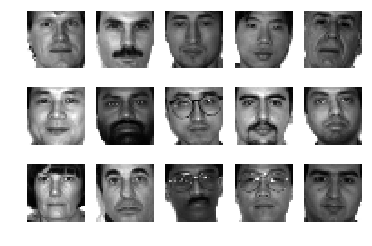

In [71]:
#visualize the Yale_32x32
#draw in a 3x5 backgound
yale_url = 'data/Yale_32x32.mat'
yale = sio.loadmat(yale_url)

print(type(yale))
keys = list( yale.keys() )
print(keys)

gnd = yale['gnd']
mxcluster = max( gnd )

dataset_yale = yale['fea']
n = len(dataset_yale)
print(n, mxcluster)

for i in range(0,165,11):
    img = dataset_yale[i].reshape(32,32)
    #calculate the position and show
    plt.subplot( 3, 5, i//11 + 1 )
    plt.axis('off')
    plt.imshow(img.T)
plt.show()

<class 'dict'>
['__header__', '__version__', '__globals__', 'data', 'labels', 'batch_label']
10000 [9]


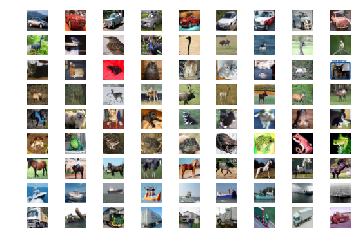

In [72]:
#visualize the data_batch_1
#draw in a 9x9 backgound
batch_url = 'data/data_batch_1.mat'
batch = sio.loadmat(batch_url)

print(type(batch))
keys = list( batch.keys() )
print(keys)

gnd = batch['labels']
mxcluster = max( gnd )

dataset_batch = batch['data']
n = len(dataset_batch)
print(n, mxcluster)

ct = 0
flg = 0
for j in range(9):
    
    lst = 0
    
    for i in range(n):
        
        cluster_ind = gnd[i]
        if cluster_ind != j+1:
            continue
        
        #the right belong_cluster is wo need or not
        lst += 1
        if lst > 9:
            break
        
        #if the belong_cluster is right, calculate the position of this image
        ct += 1
        if ct > 81:
            flg = 1
            break;
        
        #for the data is a colorful image with 3072, so we split it into 3x32x32( because 32x32x3 is failed )
        imgdata = dataset_batch[i].reshape(3,32,32)
        #get the three channels ( red, green, blue )
        r = imgdata[0].reshape(1024,1)
        g = imgdata[1].reshape(1024,1)
        b = imgdata[2].reshape(1024,1)
        #merge the three channels into a colorful image
        img_merge = np.hstack( (r,g,b) )
        #reshape the image to the executable shape for plt
        img_rgb = img_merge.reshape(32,32,3)

        plt.subplot( 9, 9, ct )
        plt.axis('off')
        plt.imshow(img_rgb)
        
    if flg:
        break
    
plt.show()